# 🌊 Dipping Toes in Deep Learning
**Source: TensorFlow in Action – Chapter 4**

Chapter 4 memperkenalkan tiga arsitektur deep learning dasar dengan TensorFlow/Keras: fully connected network (autoencoder), convolutional neural network (CNN), dan recurrent neural network (RNN) untuk time series.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models


## ✅ Ringkasan Chapter 4

**Theory**: Chapter 4 membahas pola umum dalam membangun *deep neural network*
menggunakan Keras untuk tiga jenis data utama, yaitu data tabular atau vektor
menggunakan *fully connected network* (autoencoder FCN), data citra menggunakan
*convolutional neural network* (CNN), serta data deret waktu menggunakan
*recurrent neural network* (RNN).

Meskipun diterapkan pada jenis data yang berbeda, ketiga pendekatan tersebut
memiliki struktur dasar yang sama, yaitu:

$$
\text{input} \rightarrow \text{hidden layers} \rightarrow \text{output}
$$

Perbedaannya terletak pada jenis layer yang digunakan agar sesuai dengan
karakteristik data. Model berbasis data tabular menggunakan layer `Dense`,
model citra memanfaatkan `Conv2D` dan `MaxPool2D` untuk menangkap pola spasial,
sedangkan model deret waktu menggunakan `SimpleRNN` untuk memodelkan dependensi
temporal dalam data.


In [3]:
# contoh: autoencoder untuk vektor 784-dim (misal gambar 28x28 yang di-flatten)
input_dim = 784
latent_dim = 32

inputs = layers.Input(shape=(input_dim,))
z = layers.Dense(128, activation="relu")(inputs)
z = layers.Dense(latent_dim, activation="relu")(z)
x_hat = layers.Dense(128, activation="relu")(z)
x_hat = layers.Dense(input_dim, activation="sigmoid")(x_hat)

autoencoder = models.Model(inputs=inputs, outputs=x_hat)
autoencoder.compile(
    optimizer="adam",
    loss="mse"
)

autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 128)               4224      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________


## 🖼️ Convolutional Neural Network (CNN)

**Teori**  
Convolutional Neural Network (CNN) adalah arsitektur jaringan saraf yang dirancang untuk memproses data citra dengan mempertahankan informasi spasial (tinggi dan lebar). CNN menggunakan *kernel* (filter) berukuran kecil yang digeser (*sliding*) pada input untuk mengekstraksi fitur-fitur lokal seperti tepi, tekstur, dan pola.

### Convolution Layer
Lapisan konvolusi menghasilkan *feature map* melalui operasi konvolusi antara input dan kernel, yang secara matematis dapat dituliskan sebagai:
$$
y(i,j) = \sum_{u}\sum_{v} x(i+u, j+v)\, w(u,v)
$$

### Pooling Layer
Lapisan *pooling* berfungsi untuk mengurangi resolusi *feature map* sekaligus mempertahankan informasi penting. Salah satu metode yang umum digunakan adalah *max pooling*, yang dirumuskan sebagai:
$$
y(i,j) = \max_{(u,v)\in \text{window}} x(u,v)
$$


In [7]:
!pip install tensorflow-datasets
import tensorflow_datasets as tfds

ds = tfds.load("cifar10")

train_ds = ds["train"]

def format_cifar10(example, num_classes=10):
    img = tf.cast(example["image"], tf.float32) / 255.0
    label = tf.one_hot(example["label"], depth=num_classes)
    return img, label

train_ds = (
    train_ds
    .map(lambda x: format_cifar10(x, 10), num_parallel_calls=tf.data.AUTOTUNE)
    .shuffle(5000)
    .batch(64)
    .prefetch(tf.data.AUTOTUNE)
)

for batch_x, batch_y in train_ds.take(1):
    print(batch_x.shape, batch_y.shape)


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/5.4 MB ? eta -:--:--
   - -------------------------------------- 0.2/5.4 MB 4.6 MB/s eta 0:00:02
   ------ --------------------------------- 0.8/5.4 MB 8.9 MB/s eta 0:00:01
   ------------- -------------------------- 1.9/5.4 MB 13.2 MB/s eta 0:00:01
   -------------------- ------------------- 2.7/5.4 MB 14.3 MB/s eta 0:00:01
   --------------------------- ------------ 3.8/5.4 MB 15.0 MB/s eta 0:00:01
   ---------------------------------- ----- 4.6/5.4 MB 14.7 MB/s eta 0:00:01
   ---------------------------------------  5.4/5.4 MB 15.6 MB/s eta 0:00:01
   ---------------------------------------- 5.4/5.4 MB 14.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/126.4 kB ? eta -:--:--
   ---------------------------------------- 126.4/126.4 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.0 MB ? eta -:-

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Fakhriza Bondan\tensorflow_datasets\cifar10\3.0.2.incomplete0HVXG4\cifar10-train.tfrecord*.…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Fakhriza Bondan\tensorflow_datasets\cifar10\3.0.2.incomplete0HVXG4\cifar10-test.tfrecord*..…

Dataset cifar10 downloaded and prepared to C:\Users\Fakhriza Bondan\tensorflow_datasets\cifar10\3.0.2. Subsequent calls will reuse this data.
(64, 32, 32, 3) (64, 10)


## 🏗️ Arsitektur CNN CIFAR-10

**Theory**: Pada contoh ini digunakan beberapa `Conv2D` + `MaxPool2D` dengan padding `"same"` agar dimensi feature map tidak menyusut terlalu cepat dan tetap valid sepanjang jaringan.

Sebelum `Dense`, output terakhir `Conv/Pool` di-*flatten* agar menjadi vektor 1D.


In [8]:
tf.keras.backend.clear_session()

cnn = models.Sequential([
    # 32x32x3 → 16x16x16
    layers.Conv2D(
        filters=16,
        kernel_size=(3, 3),
        strides=(2, 2),
        activation="relu",
        padding="same",
        input_shape=(32, 32, 3)
    ),
    layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    
    # 8x8x16 → 8x8x32 → 4x4x32
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])

cnn.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 64)                3

In [9]:
history_cnn = cnn.fit(
    train_ds,
    epochs=1  # naikkan kalau mau
)

history_cnn.history["accuracy"][-1], history_cnn.history["loss"][-1]


782/782 [==============================] - 11s 12ms/step - loss: 1.6989 - accuracy: 0.3835


(0.3834800124168396, 1.6988627910614014)

## 📈 RNN untuk Time Series CO₂

**Theory**: Recurrent Neural Network (RNN) memproses urutan input satu per satu sambil mempertahankan state tersembunyi \(h_t\) yang membawa informasi masa lalu.

Untuk time series, setiap sampel biasanya berupa jendela nilai \((x_{t-n+1}, \dots, x_t)\) dan target \(y_{t+1}\). 
Layer `SimpleRNN` mengimplementasikan varian Elman network dengan update state
$
h_t = \phi(W_x x_t + W_h h_{t-1} + b)
$
dan bisa mengeluarkan prediksi lewat layer `Dense` di atasnya.


In [10]:
import os
import pandas as pd
import requests

def download_co2():
    os.makedirs("data", exist_ok=True)
    save_path = os.path.join("data", "co2-mm-gl.csv")
    if not os.path.exists(save_path):
        url = "https://datahub.io/core/co2-ppm/r/co2-mm-gl.csv"
        r = requests.get(url)
        with open(save_path, "wb") as f:
            f.write(r.content)
    return save_path

path = download_co2()
data = pd.read_csv(path)
data = data.set_index("Date")

# gunakan kolom Average
ts = data["Average"].astype(float)

# buat deret differenced (Average_t - Average_{t-1})
ts_diff = ts - ts.shift(1)
ts_diff = ts_diff.fillna(method="bfill")

ts_diff.head(), ts_diff.describe()


(Date
 336.56    0.34
 337.29    0.34
 337.88    0.25
 338.32    0.21
 338.26   -0.01
 Name: Average, dtype: float64,
 count    561.000000
 mean       0.161052
 std        0.135224
 min       -0.290000
 25%        0.080000
 50%        0.160000
 75%        0.250000
 max        0.750000
 Name: Average, dtype: float64)

In [11]:
def generate_sequences(series, n_seq):
    """
    series: 1D array-like
    n_seq: total length (input window + target), mis. 13 → 12 input, 1 target
    """
    arr = np.asarray(series, dtype=np.float32)
    X, y = [], []
    for i in range(len(arr) - n_seq):
        window = arr[i:i + n_seq]
        X.append(window[:-1])  # n_seq-1
        y.append(window[-1])   # 1
    X = np.array(X).reshape(-1, n_seq - 1, 1)  # (batch, time, features)
    y = np.array(y).reshape(-1, 1)
    return X, y

n_seq = 13  # 12 langkah input, 1 target
X_rnn, y_rnn = generate_sequences(ts_diff.values, n_seq)
X_rnn.shape, y_rnn.shape


((548, 12, 1), (548, 1))

In [12]:
tf.keras.backend.clear_session()

rnn = models.Sequential([
    layers.SimpleRNN(64, input_shape=(n_seq - 1, 1)),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)  # regresi selisih CO2 berikutnya
])

rnn.compile(
    loss="mse",
    optimizer="adam"
)

history_rnn = rnn.fit(
    X_rnn,
    y_rnn,
    shuffle=True,
    batch_size=64,
    epochs=25,
    verbose=0
)

history_rnn.history["loss"][-1]


0.008063312619924545

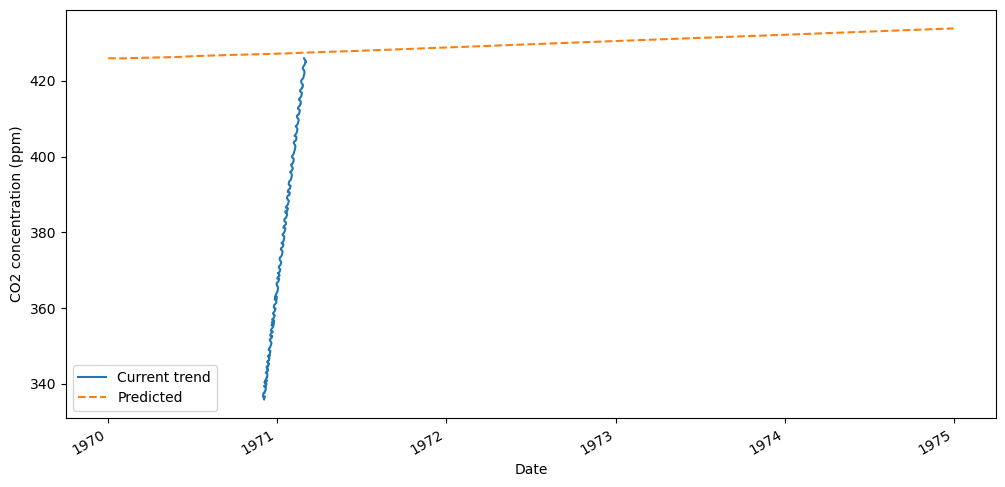

In [13]:
# gunakan 12 langkah terakhir dari ts_diff untuk memulai prediksi
history_window = ts_diff.values[-12:].reshape(1, -1, 1)
true_vals = [ts.values[-1]]  # nilai CO2 absolut terakhir
prev_true = ts.values[-1]

for _ in range(60):  # 60 bulan ke depan
    pdiff = rnn.predict(history_window, verbose=0)  # selisih yang diprediksi
    # update history window: buang yang paling awal, append prediksi baru
    history_window = np.concatenate(
        [history_window[:, 1:, :], pdiff.reshape(1, 1, 1)],
        axis=1
    )
    # konversi selisih ke nilai absolut
    next_true = prev_true + pdiff[0, 0]
    true_vals.append(next_true)
    prev_true = next_true

# buat index tanggal untuk 60 bulan ke depan
last_date = pd.to_datetime(ts.index[-1])
future_idx = pd.date_range(last_date, periods=61, freq="MS")  # termasuk titik terakhir
future_series = pd.Series(true_vals, index=future_idx)

plt.figure(figsize=(12, 6))
ts.plot(label="Current trend")
future_series.plot(label="Predicted", linestyle="--")
plt.legend()
plt.ylabel("CO2 concentration (ppm)")
plt.show()


## ✅ Ringkasan Chapter 4

**Theory**: Chapter 4 menunjukkan pola umum membangun deep network dengan Keras untuk tiga jenis data: tabular/vektor (autoencoder FCN), citra (CNN), dan deret waktu (RNN).

Ketiganya berbagi struktur dasar \(\text{input} \to \text{hidden layers} \to \text{output}\), tetapi memakai layer khusus yang berbeda (`Dense`, `Conv2D`/`MaxPool2D`, `SimpleRNN`) agar selaras dengan struktur data dan dependensi temporal/spasialnya.
